In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [2]:
from sklearn import preprocessing
from sklearn import utils

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
from sklearn.tree import DecisionTreeRegressor

In [6]:
from sklearn.linear_model import SGDRegressor

In [7]:
from sklearn.linear_model import BayesianRidge

In [99]:
import matplotlib
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.datasets as data
from sklearn import metrics

dataset = pd.read_csv('crypto.csv')
price  = dataset['quote_usd_price']
cap  = dataset['quote_usd_market_cap']

# .load(return_X_y=True)  # returns data to be used in estimator
# X is the data, y are the targets:
#print("data has shape {}, targets have shape {}.".format(X.shape, y.shape))


In [ ]:
from sklearn import datasets    

#boston = datasets.load_boston() 
crypto = datasets.load_crypto()


In [ ]:
X_train = crypto.data[:450]  #define training X set                                                                                                                           
y_train = crypto.target[:450] #define training y set                                                                                                                          

X_test = crypto.data[450:]  #define test X set                                                                                                                                
y_test = crypto.target[450:] #define test y set                                                                                                                               

lin = linear_model.LinearRegression() #initialize regressor                                                                                                                   

lin.fit(X_train, y_train) #fit training data                                                                                                                                  
preds = lin.predict(X_test) #make prediction on X test set                                                                                                                    

print metrics.mean_absolute_error(y_test, preds)

In [79]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  100 non-null    int64  
 1   name                                100 non-null    object 
 2   symbol                              100 non-null    object 
 3   slug                                100 non-null    object 
 4   num_market_pairs                    100 non-null    int64  
 5   date_added                          100 non-null    object 
 6   max_supply                          60 non-null     float64
 7   circulating_supply                  100 non-null    float64
 8   total_supply                        100 non-null    float64
 9   cmc_rank                            100 non-null    int64  
 10  last_updated                        100 non-null    object 
 11  quote_usd_price                     100 non-nu

In [80]:
rows = len(dataset)
y=rows 
rows

100

In [81]:
columns = len(dataset.columns)
columns

30

In [82]:
dataset.head(rows)


,id,name,symbol,slug,num_market_pairs,date_added,max_supply,circulating_supply,total_supply,cmc_rank,...,quote_usd_market_cap,quote_usd_market_cap_dominance,quote_usd_fully_diluted_market_cap,quote_usd_tvl,quote_usd_last_updated,platform_id,platform_name,platform_symbol,platform_slug,platform_token_address
0,1,Bitcoin,BTC,bitcoin,9620,2013-04-28T00:00:00Z,2.100000e+07,1.909138e+07,1.909138e+07,1,...,3.810000e+11,42.8880,4.190000e+11,NaN,2022-07-12T00:20:00Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,5820,2015-08-07T00:00:00Z,NaN,1.215090e+08,1.215090e+08,2,...,1.330000e+11,14.9917,1.330000e+11,NaN,2022-07-12T00:19:00Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,35968,2015-02-25T00:00:00Z,NaN,6.599093e+10,6.815698e+10,3,...,6.594197e+10,7.4160,6.810641e+10,NaN,2022-07-12T00:19:00Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,3408,USD Coin,USDC,usd-coin,4828,2018-10-08T00:00:00Z,NaN,5.554694e+10,5.554694e+10,4,...,5.554312e+10,6.2465,5.554312e+10,NaN,2022-07-12T00:19:00Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
4,1839,BNB,BNB,bnb,1001,2017-07-25T00:00:00Z,1.651168e+08,1.632770e+08,1.632770e+08,5,...,3.675065e+10,4.1331,3.716475e+10,NaN,2022-07-12T00:19:00Z,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8677,Symbol,XYM,symbol,38,2021-03-03T00:00:00Z,9.000000e+09,5.582460e+09,7.967989e+09,96,...,2.838272e+08,0.0319,4.575841e+08,NaN,2022-07-12T00:20:00Z,NaN,NaN,NaN,NaN,NaN
96,1684,Qtum,QTUM,qtum,189,2017-05-24T00:00:00Z,1.078224e+08,1.042420e+08,1.039445e+08,97,...,2.810230e+08,0.0316,2.906755e+08,NaN,2022-07-12T00:19:00Z,NaN,NaN,NaN,NaN,NaN
97,3801,BORA,BORA,bora,14,2019-03-18T00:00:00Z,NaN,9.275000e+08,1.205750e+09,98,...,2.802307e+08,0.0315,3.642999e+08,NaN,2022-07-12T00:19:00Z,4256.0,Klaytn,KLAY,klaytn,0x02cbe46fb8a1f579254a9b485788f2d86cad51aa
98,5647,Kadena,KDA,kadena,32,2020-05-31T00:00:00Z,1.000000e+09,1.848024e+08,1.000000e+09,99,...,2.735800e+08,0.0308,1.480392e+09,NaN,2022-07-12T00:19:00Z,NaN,NaN,NaN,NaN,NaN


In [83]:
dataset.dtypes

id                                      int64
name                                   object
symbol                                 object
slug                                   object
num_market_pairs                        int64
date_added                             object
max_supply                            float64
circulating_supply                    float64
total_supply                          float64
cmc_rank                                int64
last_updated                           object
quote_usd_price                       float64
quote_usd_volume_24h                  float64
quote_usd_volume_change_24h           float64
quote_usd_percent_change_1h           float64
quote_usd_percent_change_24h          float64
quote_usd_percent_change_7d           float64
quote_usd_percent_change_30d          float64
quote_usd_percent_change_60d          float64
quote_usd_percent_change_90d          float64
quote_usd_market_cap                  float64
quote_usd_market_cap_dominance    

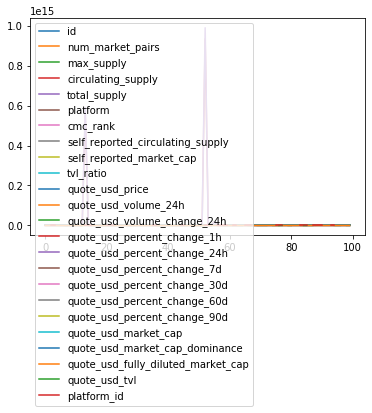

In [23]:
dataset.plot() 

In [102]:
x = cap
x = x.astype('float64')

In [103]:
y = price
y = y.astype('float64')
#y=np.array(y, dtype='float64')
#y=np.array(y, dtype='object')

In [72]:
np.array?

In [ ]:
import sklearn.naive_bayes as nb
gnb = nb.GaussianNB() # instantiates a Gaussian Naive Bayes object
gnb.fit(X=x, y=y)

In [100]:
dataset = dataset.drop(["id"], axis = 1)
dataset = dataset.drop(["name"], axis = 1)
dataset = dataset.drop(["symbol"], axis = 1)
dataset = dataset.drop(["slug"], axis = 1)
dataset = dataset.drop(["num_market_pairs"], axis = 1)
dataset = dataset.drop(["date_added"], axis = 1)
dataset = dataset.drop(["max_supply"], axis = 1)
dataset = dataset.drop(["circulating_supply"], axis = 1)
dataset = dataset.drop(["total_supply"], axis = 1)
dataset = dataset.drop(["cmc_rank"], axis = 1)
dataset = dataset.drop(["last_updated"], axis = 1)
dataset = dataset.drop(["quote_usd_volume_24h"], axis = 1)
dataset = dataset.drop(["quote_usd_volume_change_24h"], axis = 1)
dataset = dataset.drop(["quote_usd_percent_change_1h"], axis = 1)
dataset = dataset.drop(["quote_usd_percent_change_24h"], axis = 1)
dataset = dataset.drop(["quote_usd_percent_change_7d"], axis = 1)
dataset = dataset.drop(["quote_usd_percent_change_30d"], axis = 1)
dataset = dataset.drop(["quote_usd_percent_change_60d"], axis = 1)
dataset = dataset.drop(["quote_usd_percent_change_90d"], axis = 1)
dataset = dataset.drop(["quote_usd_market_cap"], axis = 1)
dataset = dataset.drop(["quote_usd_market_cap_dominance"], axis = 1)
dataset = dataset.drop(["quote_usd_fully_diluted_market_cap"], axis = 1)
dataset = dataset.drop(["quote_usd_tvl"], axis = 1)
dataset = dataset.drop(["quote_usd_last_updated"], axis = 1)
dataset = dataset.drop(["platform_name"], axis = 1)
dataset = dataset.drop(["platform_symbol"], axis = 1)
dataset = dataset.drop(["platform_slug"], axis = 1)
dataset = dataset.drop(["platform_token_address"], axis = 1)

#dataset = dataset.drop([""], axis = 1)


In [101]:
x = dataset.drop(["quote_usd_price"], axis = 1)
y = dataset.quote_usd_price.values
y = y.astype('int64')

In [102]:
np.isnan(y)
np.where(np.isnan(y))
np.nan_to_num(y)

array([19975,  1097,     0,     0,   225,     0,     0,     0,    33,
           0,     0,     6,     0,     0,     5, 19959,    17,     0,
           5,    48,    24,     0,     6,     0,     8,     3,   126,
           0,    14,    99,     0,     1,     6,     0,     1,     1,
           4,     0,     1,     5,     1,    50,    13,     8,    70,
          78,    49,     0,     0,     8,   870,    55,     0,     0,
           0,     0,    12,     0,     4,     2,     0,     0,     0,
           0,     8,  1735,     0,     0,     4,     0,     0,     0,
           0,     0,    41,     0,     2,     0,    12,    46,     1,
           0,     0,     0,    49,     5,     0,     0,     0,     0,
           0,     0,    21,     3,   111,     0,     2,     0,     1,
           2], dtype=int64)

In [ ]:
import numpy as np
# Normalization:
x = (x - np.min(x)) / (np.mаx(x) - np.min(x))

In [103]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)


In [104]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
GaussianNB()


In [ ]:
print("Naive Bayes score: ",nb.score(x_test, y_test))